In [1]:
import pandas as pd

# Load the training data
train_data = pd.read_csv("/home/user/Portofolio/archive/train.csv")

# Load the test data
test_data = pd.read_csv("/home/user/Portofolio/archive/test.csv")

# Print the first few rows of the training data to see the available columns
print("Training data head:")
print(train_data.head())

# Print the first few rows of the test data to see the available columns
print("\nTest data head:")
print(test_data.head())


Training data head:
       AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0  12.728  1007.8  87.949  4.4928  24.333  1086.3  550.02  134.41  11.838   
1  24.577  1011.4  47.300  2.9115  18.739  1051.0  549.94  104.80  10.141   
2  14.084  1017.6  73.675  2.9318  19.350  1057.5  550.03  112.21  10.535   
3  32.422  1011.0  52.727  4.5852  29.825  1099.6  540.82  146.50  13.279   
4  13.788  1016.8  86.933  3.5058  24.090  1085.8  550.03  133.33  11.775   

        CO     NOX  
0  0.95374  74.117  
1  2.54190  61.887  
2  3.90110  75.568  
3  0.35179  52.580  
4  1.73960  69.873  

Test data head:
        AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0  26.7190  1015.1  66.716  3.3469  20.501  1061.7  550.22  111.54  10.649   
1  12.8100  1010.8  97.559  4.5922  24.477  1086.4  549.95  134.39  11.952   
2  15.9570  1003.9  97.333  3.2234  19.502  1056.2  549.91  111.76  10.583   
3   5.6085  1016.0  72.342  3.8608  23.498  1084.2  549.91  13

Mean Squared Error (Extra Trees Regression) on Training Data: 9.893378516076401e-27
      True NOX  Predicted NOX
0       74.117         74.117
1       61.887         61.887
2       75.568         75.568
3       52.580         52.580
4       69.873         69.873
...        ...            ...
5182    58.918         58.918
5183    60.109         60.109
5184    63.901         63.901
5185    79.388         79.388
5186    83.631         83.631

[5187 rows x 2 columns]


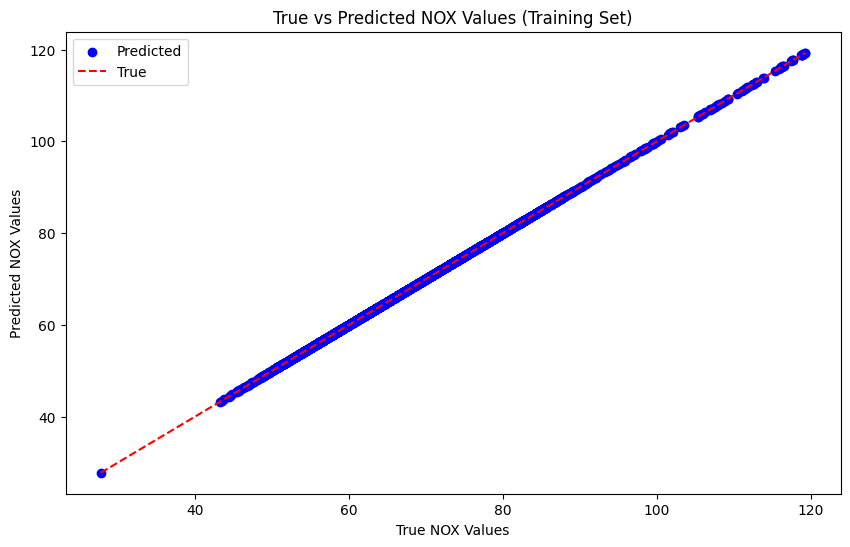

In [30]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error

# Load the training data
train_data = pd.read_csv("/home/user/Portofolio/archive/train.csv")

# Load the test data
test_data = pd.read_csv("/home/user/Portofolio/archive/test.csv")

# Extract features (X) and target (y) from the training data
X_train = train_data.drop(columns=['NOX'])
y_train = train_data['NOX']

# Initialize the Extra Trees Regression model
model_extra_trees = ExtraTreesRegressor(random_state=79)

# Train the model
model_extra_trees.fit(X_train, y_train)

# Make predictions on the training set
train_predictions_extra_trees = model_extra_trees.predict(X_train)

# Compare the predicted NOX values with the real NOX values from the training data
train_true_nox_values = y_train

# Calculate Mean Squared Error on the training data
mse_train_extra_trees = mean_squared_error(train_true_nox_values, train_predictions_extra_trees)
print("Mean Squared Error (Extra Trees Regression) on Training Data:", mse_train_extra_trees)

# Compare predicted and true values on the training data
comparison_train_df = pd.DataFrame({'True NOX': train_true_nox_values, 'Predicted NOX': train_predictions_extra_trees})
print(comparison_train_df)

import matplotlib.pyplot as plt

# Plot true vs predicted values for the training set
plt.figure(figsize=(10, 6))
plt.scatter(train_true_nox_values, train_predictions_extra_trees, color='blue', label='Predicted')
plt.plot([train_true_nox_values.min(), train_true_nox_values.max()], 
         [train_true_nox_values.min(), train_true_nox_values.max()], 
         color='red', linestyle='--', label='True')
plt.xlabel('True NOX Values')
plt.ylabel('Predicted NOX Values')
plt.title('True vs Predicted NOX Values (Training Set)')
plt.legend()
plt.show()

Mean Squared Error (Linear Regression) on Training Data: 38.23930247134531
      True NOX  Predicted NOX
0       74.117      73.446083
1       61.887      67.490086
2       75.568      76.593002
3       52.580      50.347950
4       69.873      71.420199
...        ...            ...
5182    58.918      58.946724
5183    60.109      65.759595
5184    63.901      62.648599
5185    79.388      77.529540
5186    83.631      85.215308

[5187 rows x 2 columns]


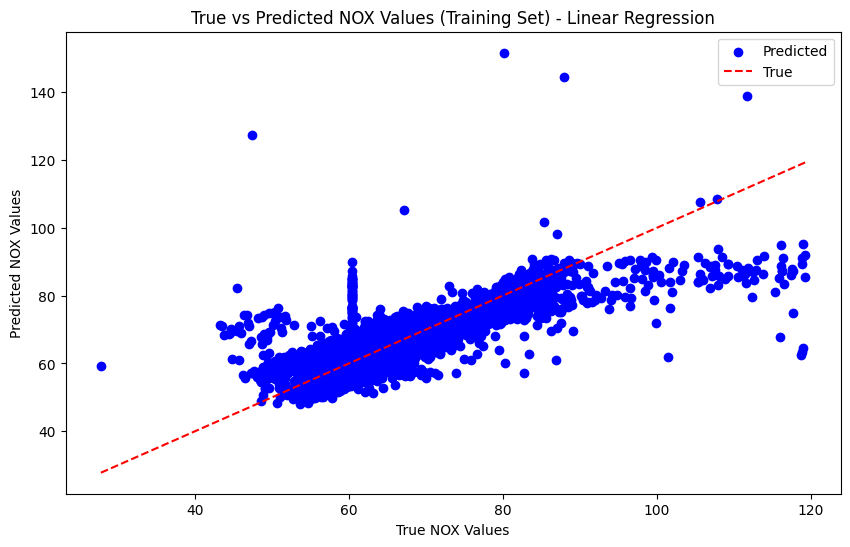

In [31]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
model_lr = LinearRegression()

# Train the model
model_lr.fit(X_train, y_train)

# Make predictions on the training set
train_predictions_lr = model_lr.predict(X_train)

# Calculate Mean Squared Error on the training data
mse_train_lr = mean_squared_error(y_train, train_predictions_lr)
print("Mean Squared Error (Linear Regression) on Training Data:", mse_train_lr)

# Compare predicted and true values on the training data
comparison_train_df_lr = pd.DataFrame({'True NOX': y_train, 'Predicted NOX': train_predictions_lr})
print(comparison_train_df_lr)

# Plot true vs predicted values for the training set using Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_train, train_predictions_lr, color='blue', label='Predicted')
plt.plot([y_train.min(), y_train.max()], 
         [y_train.min(), y_train.max()], 
         color='red', linestyle='--', label='True')
plt.xlabel('True NOX Values')
plt.ylabel('Predicted NOX Values')
plt.title('True vs Predicted NOX Values (Training Set) - Linear Regression')
plt.legend()
plt.show()


Mean Squared Error (Random Forest Regression) on Training Data: 1.4453033281842957
      True NOX  Predicted NOX
0       74.117       74.09333
1       61.887       62.05334
2       75.568       75.36448
3       52.580       53.42299
4       69.873       71.32465
...        ...            ...
5182    58.918       59.69699
5183    60.109       60.18214
5184    63.901       63.12180
5185    79.388       79.42910
5186    83.631       83.40444

[5187 rows x 2 columns]


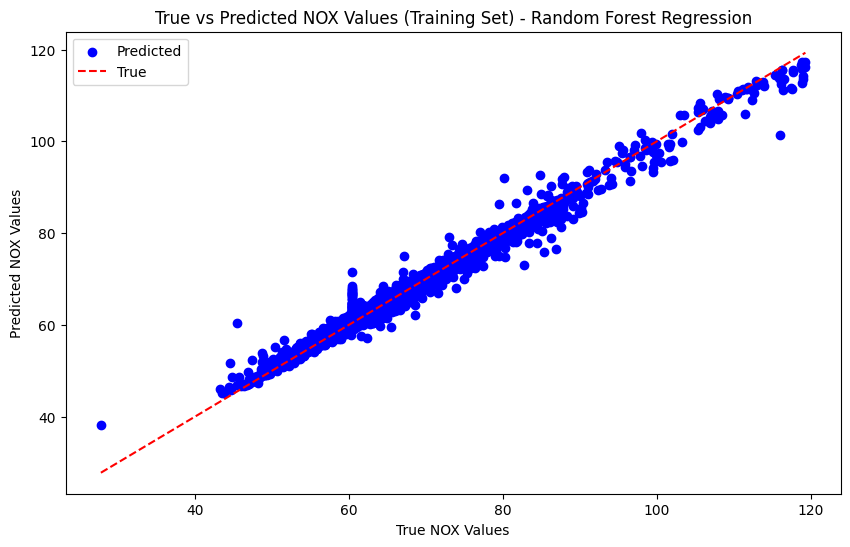

In [32]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regression model
model_rf = RandomForestRegressor(random_state=79)

# Train the model
model_rf.fit(X_train, y_train)

# Make predictions on the training set
train_predictions_rf = model_rf.predict(X_train)

# Calculate Mean Squared Error on the training data
mse_train_rf = mean_squared_error(y_train, train_predictions_rf)
print("Mean Squared Error (Random Forest Regression) on Training Data:", mse_train_rf)

# Compare predicted and true values on the training data
comparison_train_df_rf = pd.DataFrame({'True NOX': y_train, 'Predicted NOX': train_predictions_rf})
print(comparison_train_df_rf)

# Plot true vs predicted values for the training set using Random Forest Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_train, train_predictions_rf, color='blue', label='Predicted')
plt.plot([y_train.min(), y_train.max()], 
         [y_train.min(), y_train.max()], 
         color='red', linestyle='--', label='True')
plt.xlabel('True NOX Values')
plt.ylabel('Predicted NOX Values')
plt.title('True vs Predicted NOX Values (Training Set) - Random Forest Regression')
plt.legend()
plt.show()


Mean Squared Error (Gradient Boosting Regression) on Training Data: 10.205995165543612
      True NOX  Predicted NOX
0       74.117      72.907527
1       61.887      63.857234
2       75.568      75.696935
3       52.580      56.597910
4       69.873      72.485832
...        ...            ...
5182    58.918      61.734603
5183    60.109      59.716815
5184    63.901      61.959511
5185    79.388      79.719905
5186    83.631      83.421387

[5187 rows x 2 columns]


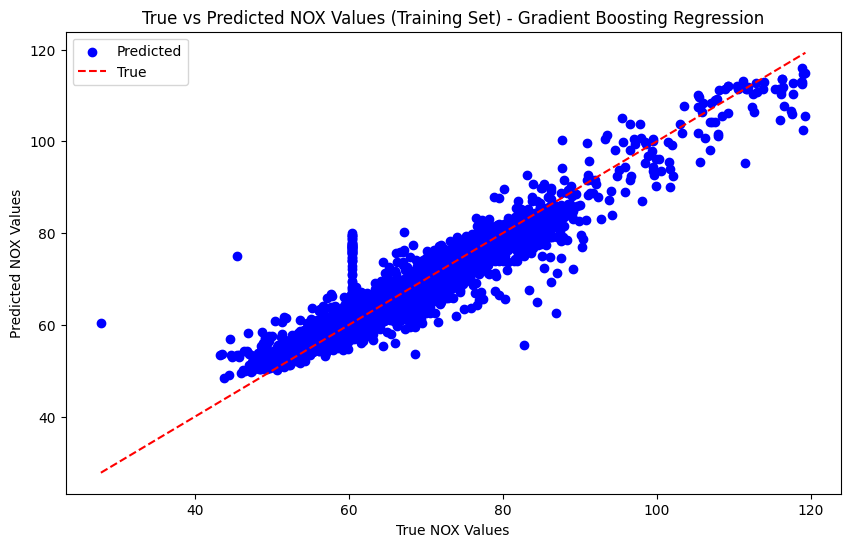

In [34]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regression model
model_gb = GradientBoostingRegressor(random_state=79)

# Train the model
model_gb.fit(X_train, y_train)

# Make predictions on the training set
train_predictions_gb = model_gb.predict(X_train)

# Calculate Mean Squared Error on the training data
mse_train_gb = mean_squared_error(y_train, train_predictions_gb)
print("Mean Squared Error (Gradient Boosting Regression) on Training Data:", mse_train_gb)

# Compare predicted and true values on the training data
comparison_train_df_gb = pd.DataFrame({'True NOX': y_train, 'Predicted NOX': train_predictions_gb})
print(comparison_train_df_gb)

# Plot true vs predicted values for the training set using Gradient Boosting Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_train, train_predictions_gb, color='blue', label='Predicted')
plt.plot([y_train.min(), y_train.max()], 
         [y_train.min(), y_train.max()], 
         color='red', linestyle='--', label='True')
plt.xlabel('True NOX Values')
plt.ylabel('Predicted NOX Values')
plt.title('True vs Predicted NOX Values (Training Set) - Gradient Boosting Regression')
plt.legend()
plt.show()



Mean Squared Error (SVR) on Training Data: 17.868657596035145
      True NOX  Predicted NOX
0       74.117      74.304994
1       61.887      62.577168
2       75.568      76.489646
3       52.580      55.549880
4       69.873      72.004934
...        ...            ...
5182    58.918      60.515516
5183    60.109      61.313226
5184    63.901      62.621599
5185    79.388      80.152426
5186    83.631      82.957435

[5187 rows x 2 columns]


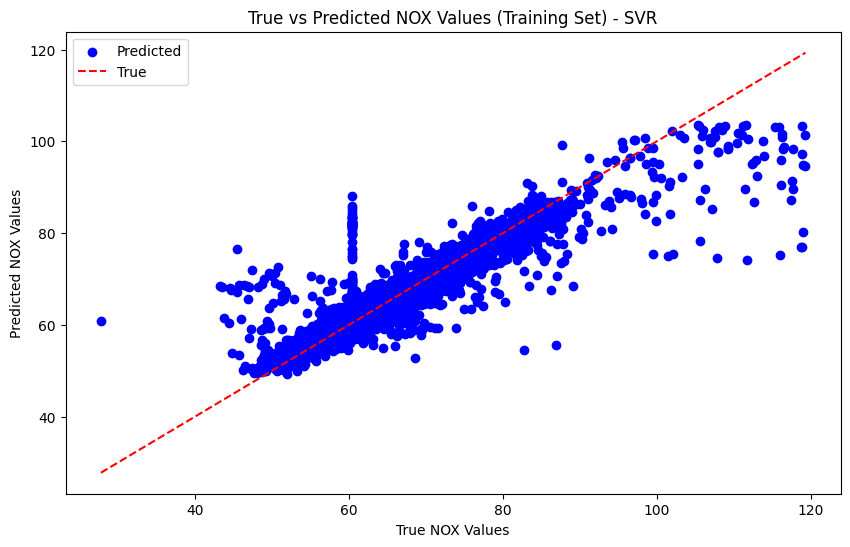

In [35]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Initialize the Support Vector Regression model
model_svr = SVR()

# Train the model
model_svr.fit(X_train_scaled, y_train)

# Make predictions on the training set
train_predictions_svr = model_svr.predict(X_train_scaled)

# Calculate Mean Squared Error on the training data
mse_train_svr = mean_squared_error(y_train, train_predictions_svr)
print("Mean Squared Error (SVR) on Training Data:", mse_train_svr)

# Compare predicted and true values on the training data
comparison_train_df_svr = pd.DataFrame({'True NOX': y_train, 'Predicted NOX': train_predictions_svr})
print(comparison_train_df_svr)

# Plot true vs predicted values for the training set using SVR
plt.figure(figsize=(10, 6))
plt.scatter(y_train, train_predictions_svr, color='blue', label='Predicted')
plt.plot([y_train.min(), y_train.max()], 
         [y_train.min(), y_train.max()], 
         color='red', linestyle='--', label='True')
plt.xlabel('True NOX Values')
plt.ylabel('Predicted NOX Values')
plt.title('True vs Predicted NOX Values (Training Set) - SVR')
plt.legend()
plt.show()
